Guide: only need to change the url(careful with the link format and plz start at the second review page)

LDA does not work for companies with limited reviews,but WordCloud is always alvaliable

In [5]:
import requests
import json
import pandas as pd
from bs4 import BeautifulSoup
import re
import time
from lxml import etree


In [6]:
from nltk import word_tokenize
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from scipy.misc import imread
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import lda 
from collections import Counter

In [7]:
def get_vector(sentence,vocab):
    temp=[]
    for word in vocab:
        if word in sentence:
            temp.append(1)
        else:
            temp.append(0)
    return temp

In [8]:
headers={'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.100 Safari/537.36'}
cookies={'cookie': '__cfduid=d77f3c2e4594a1be5d57bc7df46d8e6521579405430; gdId=28cef7b4-57de-4aec-beb5-f89d31dccf19; trs=direct:direct:direct:2020-01-18+19%3A43%3A52.394:undefined:undefined; _ga=GA1.2.555149445.1579405436; _gcl_au=1.1.1356910658.1579405437; __gads=ID=c1f5cb1e31567aee:T=1579405439:S=ALNI_MYkLaabE1revP_XrpzrpHz0MT1Pig; _fbp=fb.1.1579405439477.95188748; G_ENABLED_IDPS=google; __qca=P0-1894964485-1579405440369; uc=8F0D0CFA50133D96DAB3D34ABA1B8733E8FE9FCA0F29D3AA8B2E2ED689A1B8E0A13AB5CB28D25EC75FBB2F6399362D1F49E029A5C26A2A800FEE76AF6ABA4EAC09F83BB4B5EF0A7F21066A0A02A7D595F8961221C1D7CC13A1A4B170DAF6E69E9623F968939203D8D110D89AC57EBE49BC0250BFCD8667065F84A88E6549DDE926E8F12332D0595BD1B202304E137C760ED75AC5AD81D85BB710C7C894DF4D59; _gid=GA1.2.1087296046.1580115667; ht=%7B%22quantcast%22%3A%5B%22D%22%5D%7D; rm=MTUzODIyNTAwNTFAMTYzLmNvbToxNjExNjczMjk3MTQxOjIzNDk5N2EyYTgzMjY4YjZhMmU4NzE3YjAwZTM2YTA4; JSESSIONID=49970F3F8C1C152C0DE24724A399CFFD; _uac=0000016fe98dfaca83e60ccffe6330c7; GSESSIONID=49970F3F8C1C152C0DE24724A399CFFD; JSESSIONID_JX_APP=1204CDAE3DA508880973363EF2ACBD5B; at=E9crzk6PG5ko-obFdFwgFm2eh0AV-z4EqbQKuMfiaJEmPo66V8VoGgu-ooUv87xhxalBrNCFgfPjn4Nk-pfM1_musYoWInSOoHuMkjGT3uvk4m__fUjWX89uTiKzexJRwO1xxgKSG_dT8-szaP4D82Z-7cdevjTbGd8d20lUiWFWM3yt8vSEdOc1wgcZaqgBU4wjgusFeeSpM44OGjCC0mCNUNroKLy9qgq1xf_WmvFcaM5BtHDL3upJeRfeX9U158xZW55u7MsxMOf5xoXNoUj8KksG1bqWV0BEhmxSffWzexXEJUe7AaFkdU7PXZdCY0PR1yP1-Az73NnZj2PyBlmcX4equSN8yJRwWPRl4fL1SExKDdanmTE63UYnOiuWKHXjKpM5i29TEjI4kL-O8-THip9yQm3A-qhSPHnACklUmjTPWox2QGOC0IqJK-bmtCJLLhB5RwNXbNTMMvkOSnJ5cak50wU4icdiESUhNWOtnyWXymUyHFcuiXsn7C7_XlkcaPiU4-u2R6FBxqJ8sb9Tf3IS9p4Ai2JGc2E8eMjWZwEvM3OoSvMAV7oLmc_nOg6_b6z8tSn3mMe92bXR8su8HvulDvwLZ2GZ04BYzqk8OX2zwOipzwPUJUJkJ9B89ooEjMh0LjMO-JCBYDr_dQMeU9U_hi2e2D9rU4TTo6AlFI8EhaVN6d4fQ6tajGukmf6w0bLbeXBg_g0_Sp1fUwQqvdNzXmPCoBKYj8j2CLdeG-asN93_UbasvRFYn38ktwutHkkbm70UUvGFRAEjE-4w-o2JCjNyLuaI3YHNUHHmpm3ntTpEIjtpO9EWTyRgQen9llsOD7dAmW6vCcF9j2lRaV-US4qrWjlsqH_kGuCoR7cmRLagjvE1jNeibw; _dc_gtm_UA-2595786-1=1; cass=1; AWSALB=TlBlY4nUwml9k5e2BaiWmyPQ44R/PQsttaUd6fhkNJZ+esEfQGqKMxOf1Gzg8uWJuyhO4G3EcRlkVX92GRYEW5s+irPkKkSPQLuFeVDoijiOD9DKILaNXGjiLBK8WG6Z6D/XCfdr3tkuErAe7rAUJ6FioyynnAMQoBklLyKqj+tKVeqV6hndho+b3LlgyQZxrND4ipkKenwviI6NCAln+aSMi6VyrtoIaP+9pKLTZfDlmlGKl2F4Ul5hJgUPR7SzoovZa/988nDuB23snRwn299l3R0Vgl2eM8+0EGY5A+Z3/ECLTEDldYrYSAj9qLPx; AWSALBCORS=TlBlY4nUwml9k5e2BaiWmyPQ44R/PQsttaUd6fhkNJZ+esEfQGqKMxOf1Gzg8uWJuyhO4G3EcRlkVX92GRYEW5s+irPkKkSPQLuFeVDoijiOD9DKILaNXGjiLBK8WG6Z6D/XCfdr3tkuErAe7rAUJ6FioyynnAMQoBklLyKqj+tKVeqV6hndho+b3LlgyQZxrND4ipkKenwviI6NCAln+aSMi6VyrtoIaP+9pKLTZfDlmlGKl2F4Ul5hJgUPR7SzoovZa/988nDuB23snRwn299l3R0Vgl2eM8+0EGY5A+Z3/ECLTEDldYrYSAj9qLPx; _gat_UA-2595786-1=1'}
my_stopwords=set(STOPWORDS)
my_stopwords.update(['MCAP','benefit','hours','day','Good','Great','I',
                     'A','great','good','co','lot','able','The','company',
                     'job','employee','bank','lots','work','people','one','product'])


In [9]:
pros=[]
Pros=[]
for w in range(2,100):
    url='https://www.glassdoor.ca/Reviews/OpenText-Reviews-E5694_P{}.htm'.format(w)
    res=requests.get(url,headers=headers,cookies=cookies)
    soup=BeautifulSoup(res.text,'lxml')
#     for i in soup.find_all('a',class_="reviewLink"):
#         headlines.append(i.text)
    for j in soup.find_all('div',class_="col-sm-11 pl-sm-lg mx-0"):
        comment=j.find('div',class_="mt-md common__EiReviewTextStyles__allowLineBreaks") 
        pros.append(comment)
    time.sleep(1)
for p in pros:
    pro=p.find_all('p')
    Pros.append(pro[1].text)
#         cons.append(comment[1].text)
#     for u in soup.find_all('time',class_="date subtle small"):
#         data.append(u.text)
#         time.sleep(1.5)

#     print(headline)

In [10]:
Company_Reviews=pd.DataFrame()
# Company_Reviews['date']=data
# Company_Reviews['headlines']=headlines
Company_Reviews['pros']=Pros
# Company_Reviews['cons']=cons


In [11]:
#LDA text mining
word_tokens=[word_tokenize(i) for i in Company_Reviews['pros']]
cleaned=[]
f_cleaned=[]
a_cleaned=[]
vocab=[]
X=[]
clean_tokens=[[word for word in i if word.isalnum()]for i in word_tokens]
for i in clean_tokens:
    for j in i:
        cleaned.append(j)

for i in cleaned:
    if i in my_stopwords:
        a_cleaned.append(i)
    else:
        f_cleaned.append(i)

word_count=Counter(f_cleaned)

for word in word_count.keys():
    if word_count[word]>10:
        vocab.append(word)

for i in cleaned:
    X.append(get_vector(i,vocab))
X=np.array(X)
lda_model=lda.LDA(n_topics=3,n_iter=200,random_state=1)
lda_model.fit(X)
topic=lda_model.topic_word_
for i in range(3):
    index=np.argsort(topic[i])[::-1]
    print(np.array(vocab)[index][1:5])

INFO:lda:n_documents: 16680
INFO:lda:vocab_size: 159
INFO:lda:n_words: 4735
INFO:lda:n_topics: 3
INFO:lda:n_iter: 200
INFO:lda:<0> log likelihood: -30564
INFO:lda:<10> log likelihood: -25385
INFO:lda:<20> log likelihood: -24634
INFO:lda:<30> log likelihood: -24197
INFO:lda:<40> log likelihood: -24170
INFO:lda:<50> log likelihood: -23942
INFO:lda:<60> log likelihood: -23852
INFO:lda:<70> log likelihood: -23780
INFO:lda:<80> log likelihood: -23871
INFO:lda:<90> log likelihood: -23772
INFO:lda:<100> log likelihood: -23740
INFO:lda:<110> log likelihood: -23705
INFO:lda:<120> log likelihood: -23728
INFO:lda:<130> log likelihood: -23721
INFO:lda:<140> log likelihood: -23769
INFO:lda:<150> log likelihood: -23724
INFO:lda:<160> log likelihood: -23733
INFO:lda:<170> log likelihood: -23673
INFO:lda:<180> log likelihood: -23746
INFO:lda:<190> log likelihood: -23647
INFO:lda:<199> log likelihood: -23669


['team' 'management' 'balance' '1']
['working' 'office' 'Open' 'pay']
['balance' 'Work' 'place' 'learn']


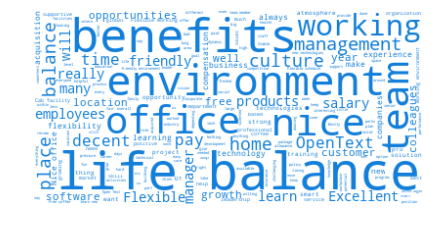

In [12]:
#Make WordCloud
text = " ".join(review for review in f_cleaned)
mask = np.array(Image.open(r'C:\Users\wangchu\Desktop\blue2.jpg'))
image_colors = ImageColorGenerator(mask)
cloud=WordCloud(background_color='white',stopwords=my_stopwords).generate(text)
plt.figure(figsize=(7,7))
plt.axis('off')
plt.imshow(cloud.recolor(color_func=image_colors),interpolation='bilinear')